In [1]:
import geopandas
gdf = geopandas.read_file('../data/historical_fires_extra_features.geojson')
gdf

,FIRE_NUMBER,FIRE_YEAR,IGNITION_DATE,FIRE_CAUSE,FIRE_LABEL,FIRE_CENTRE,ZONE,FIRE_ID,FIRE_TYPE,GEOGRAPHIC_DESCRIPTION,...,distance_to_campground,RAILWAY_TRACK_ID,TRACK_CLASSIFICATION,USE_TYPE,STATUS,OPERATOR_ENGLISH_NAME,OWNER_NAME,SUBDIVISION1_NAME,distance_to_railway,geometry
0,K50756,2013,20130818091300,Person,2013-K50756,5.0,5.0,500756,Nuisance Fire,Darke Lake,...,9986.658197,997,Main,Freight,Operational,Canadian National,Canadian National,Lumby,59542.323411,POINT (449674.348 9404961.032)
1,K51091,2007,20070807110300,Person,2007-K51091,5.0,5.0,501091,Nuisance Fire,Jack Pine Lake,...,15246.449528,997,Main,Freight,Operational,Canadian National,Canadian National,Lumby,44744.070156,POINT (467426.364 9394601.220)
2,K51224,2007,20070818162200,Person,2007-K51224,5.0,5.0,501224,Nuisance Fire,Brenda Lake,...,28084.500704,3891,Main,Freight,Operational,Canadian National,Canadian National,Okanagan,58405.069728,POINT (475358.393 9411179.856)
3,K51245,2008,20080804121700,Person,2008-K51245,5.0,5.0,501245,Nuisance Fire,Darke lk,...,10036.413041,997,Main,Freight,Operational,Canadian National,Canadian National,Lumby,59575.877829,POINT (449761.875 9405034.743)
4,K50768,2008,20080712143400,Person,2008-K50768,5.0,5.0,500768,Nuisance Fire,Islaht Lake,...,21868.318358,997,Main,Freight,Operational,Canadian National,Canadian National,Lumby,42241.112756,POINT (473879.754 9392463.984)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101645,V70002,1992,19920513,Person,1992-V70002,2.0,7.0,2,Fire,None,...,3870.717251,8239,Siding,Freight and Passenger,Operational,Southern Railway of Vancouver Island,Island Corridor Foundation,Victoria,109864.318057,POINT (770905.247 9828410.027)
101646,V70034,1992,19920803,Person,1992-V70034,2.0,7.0,34,Fire,None,...,6100.514575,8239,Siding,Freight and Passenger,Operational,Southern Railway of Vancouver Island,Island Corridor Foundation,Victoria,101975.241525,POINT (763696.534 9823359.696)
101647,R80006,1982,19820820,Person,1982-R80006,3.0,8.0,6,Fire,None,...,944.334938,6595,Spur,Freight,Operational,Canadian National,Canadian National,Skeena,155584.051672,POINT (1551254.509 9710017.638)
101648,R80007,1982,19820818,Person,1982-R80007,3.0,8.0,7,Fire,None,...,2733.407258,6595,Spur,Freight,Operational,Canadian National,Canadian National,Skeena,152795.652367,POINT (1549465.149 9712208.289)


In [27]:
import pandas as pd
cut_bins = [0, 1000, 2000, 5000, 10000, 20000, 30000, 50000]

print(pd.cut(gdf['distance_to_campground'], bins=cut_bins).value_counts())
print(pd.cut(gdf['distance_to_railway'], bins=cut_bins).value_counts())

(5000, 10000]     27491
(2000, 5000]      24020
(10000, 20000]    23910
(20000, 30000]     9795
(1000, 2000]       7249
(30000, 50000]     4771
(0, 1000]          2941
Name: distance_to_campground, dtype: int64
(0, 1000]         16535
(10000, 20000]    13280
(5000, 10000]     12277
(2000, 5000]      11714
(30000, 50000]    11364
(20000, 30000]     8100
(1000, 2000]       7951
Name: distance_to_railway, dtype: int64


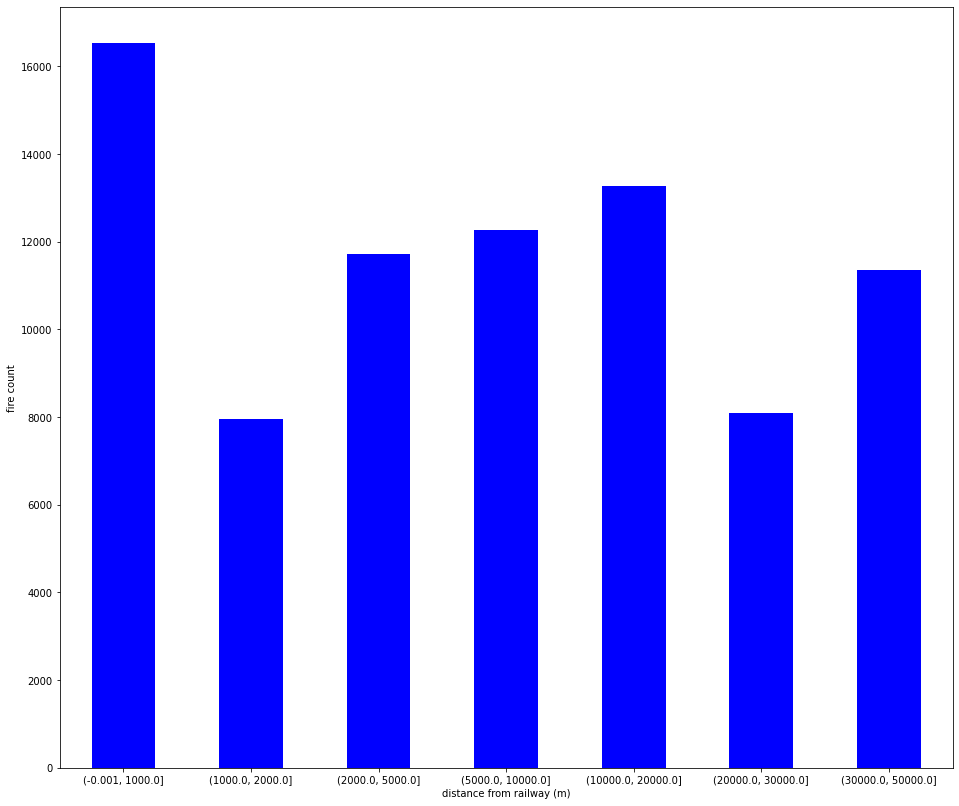

In [34]:
import matplotlib.pyplot as plt

cut_bins = [0, 1000, 2000, 5000, 10000, 20000, 30000, 50000]
out = pd.cut(gdf['distance_to_railway'], bins=cut_bins, include_lowest=True)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(16,14))
plt.ylabel("fire count")
plt.xlabel("distance from railway (m)")

plt.show()


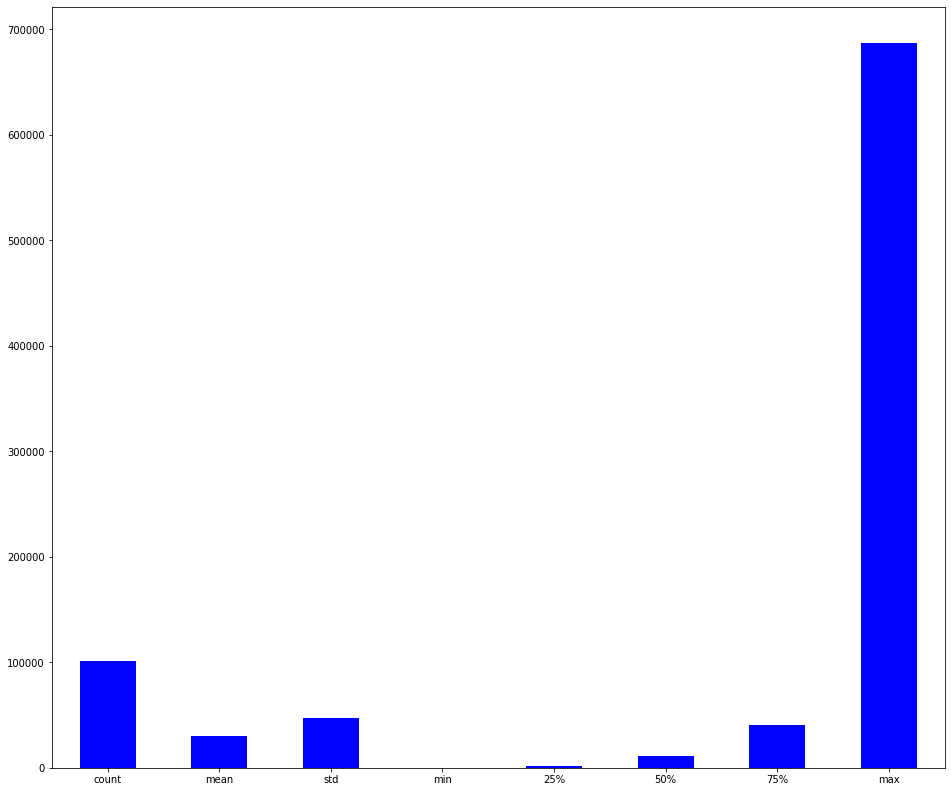

In [37]:
import matplotlib.pyplot as plt

out = gdf['distance_to_railway'].describe()
ax = out.plot.bar(rot=0, color="b", figsize=(16,14))

plt.show()